In [1]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #data viz
from matplotlib.gridspec import GridSpec #data viz
import seaborn as sns #data viz
!pip install pywaffle
from pywaffle import Waffle #data viz
from sklearn.compose import ColumnTransformer #data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler #data preprocessing
from sklearn.impute import KNNImputer #handle missing values
from imblearn.over_sampling import SMOTE #balance classes
from sklearn.model_selection import train_test_split #train/test dataset
from tensorflow.keras import layers, models #neural network architecture
from tensorflow.keras.callbacks import EarlyStopping #regularization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras #keras
import tensorflow as tf #tensorflow
from sklearn.metrics import accuracy_score, recall_score ,precision_score, f1_score #evaluate model

In [2]:
# Read in data
pd.set_option('display.max_columns', None)
stroke_data = pd.read_csv("/Users/barbu/OneDrive/Documents/BOOTCAMP-Final_Project/Final_Project/patients.csv", index_col='id')
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
# Read in encoded data
pd.set_option('display.max_columns', None)
encoded_data = pd.read_csv("/Users/barbu/OneDrive/Documents/BOOTCAMP-Final_Project/Final_Project/clean_stroke_data.csv")
encoded_data.head()

,index,hypertension,heart_disease,stroke,age_grouping,bmi_grouping,gl_grouping,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Selfemployed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerlysmoked,smoking_status_neversmoked,smoking_status_smokes
0,0,0,1,1,3,3,3,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,1,1,3,3,2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,2,0,0,1,2,3,3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,3,1,0,1,3,1,3,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
4,4,0,0,1,3,2,3,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [4]:
stroke_data.describe()
# All null values were dropped

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
encoded_data.describe()

,index,hypertension,heart_disease,stroke,age_grouping,bmi_grouping,gl_grouping,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Selfemployed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerlysmoked,smoking_status_neversmoked,smoking_status_smokes
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,2454.000000,0.091872,0.049501,0.042575,1.528417,2.084946,1.507435,0.590141,0.409656,0.000204,0.347321,0.652679,0.128336,0.004482,0.572622,0.157873,0.136688,0.492768,0.507232,0.302098,0.170503,0.377266,0.150132
std,1417.250566,0.288875,0.216934,0.201917,1.124964,1.079329,1.114564,0.491858,0.491820,0.014273,0.476167,0.476167,0.334497,0.066801,0.494748,0.364659,0.343552,0.499999,0.499999,0.459214,0.376113,0.484752,0.357238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1227.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2454.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3681.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,4908.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
encoded_data.corr()

,index,hypertension,heart_disease,stroke,age_grouping,bmi_grouping,gl_grouping,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Selfemployed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerlysmoked,smoking_status_neversmoked,smoking_status_smokes
index,1.000000,-0.062327,-0.068525,-0.349695,-0.089447,-0.049091,-0.056049,0.012776,-0.012928,0.005198,0.051487,-0.051487,0.025378,0.006493,-0.040976,-0.010720,0.044416,-0.020728,0.020728,0.036450,-0.015087,-0.008058,-0.020037
hypertension,-0.062327,1.000000,0.115991,0.142515,0.270026,0.163167,0.101344,-0.021730,0.021863,-0.004540,-0.162406,0.162406,0.019232,-0.021341,-0.004637,0.111794,-0.126561,0.001074,-0.001074,-0.143219,0.062078,0.066717,0.028214
heart_disease,-0.068525,0.115991,1.000000,0.137938,0.246790,0.069057,0.087380,-0.082882,0.082983,-0.003257,-0.111245,0.111245,0.005095,-0.015312,-0.000279,0.081484,-0.088072,0.002362,-0.002362,-0.074468,0.071339,-0.020685,0.048686
stroke,-0.349695,0.142515,0.137938,1.000000,0.214882,0.058194,0.073285,-0.006851,0.006939,-0.003010,-0.105089,0.105089,0.003553,-0.014149,0.014934,0.055356,-0.080971,-0.006031,0.006031,-0.075016,0.057320,0.010723,0.021530
age_grouping,-0.089447,0.270026,0.246790,0.214882,1.000000,0.359378,0.112728,0.017003,-0.016810,-0.006705,-0.670180,0.670180,0.131085,-0.091167,0.071978,0.308173,-0.540665,-0.008419,0.008419,-0.341019,0.235339,0.085326,0.074810
bmi_grouping,-0.049091,0.163167,0.069057,0.058194,0.359378,1.000000,0.095254,-0.001953,0.002370,-0.014350,-0.383692,0.383692,0.091134,-0.025062,0.218714,0.092232,-0.496726,0.002460,-0.002460,-0.302956,0.127434,0.117092,0.096382
gl_grouping,-0.056049,0.101344,0.087380,0.073285,0.112728,0.095254,1.000000,-0.048331,0.047780,0.019117,-0.076466,0.076466,-0.004200,-0.005921,0.010198,0.025435,-0.036443,0.022490,-0.022490,-0.042805,0.028811,0.015548,0.003592
gender_Female,0.012776,-0.021730,-0.082882,-0.006851,0.017003,-0.001953,-0.048331,1.000000,-0.999579,-0.017128,-0.036703,0.036703,0.015123,-0.012297,0.038611,0.022312,-0.091619,-0.004598,0.004598,-0.057893,-0.039592,0.094051,-0.011519
gender_Male,-0.012928,0.021863,0.082983,0.006939,-0.016810,0.002370,0.047780,-0.999579,1.000000,-0.011891,0.036138,-0.036138,-0.014965,0.012326,-0.038972,-0.022134,0.091791,0.004178,-0.004178,0.058170,0.038681,-0.093736,0.011694
gender_Other,0.005198,-0.004540,-0.003257,-0.003010,-0.006705,-0.014350,0.019117,-0.017128,-0.011891,1.000000,0.019567,-0.019567,-0.005477,-0.000958,0.012332,-0.006180,-0.005680,0.014482,-0.014482,-0.009391,0.031484,-0.011110,-0.005999


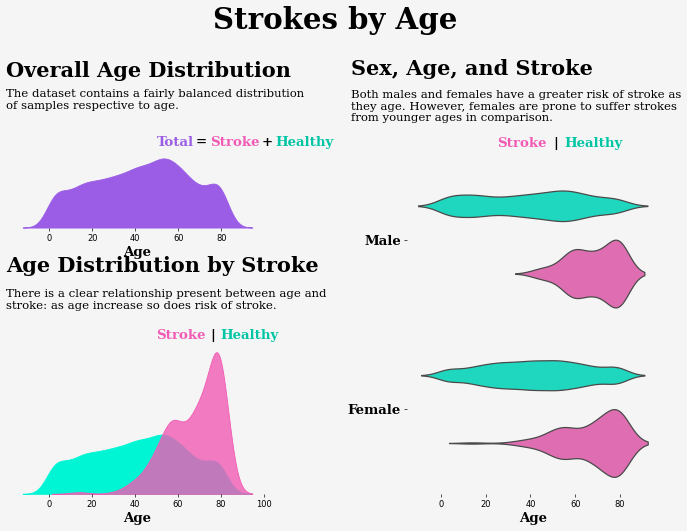

In [7]:
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['#00f5d4','#f15bb5']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 6:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)


#-------Ax 1------------------------------------------------
sns.kdeplot('age', data=stroke_data, ax=ax1, shade=True, color='#9b5de5', alpha=1)
ax1.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.text(-20, 0.035, 'Overall Age Distribution', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax1.text(-20, 0.0275, 'The dataset contains a fairly balanced distribution \nof samples respective to age.',
         {'font':'Serif', 'color': 'black', 'size':14})
ax1.text(50, 0.019, 'Total',{'font':'Serif', 'size':'16','color': '#9b5de5','weight':'bold'})
ax1.text(68, 0.019, '=',{'font':'Serif', 'size':'16','color': 'black','weight':'bold'})
ax1.text(75, 0.019, 'Stroke',{'font':'Serif', 'size':'16','color': '#f15bb5','weight':'bold'})
ax1.text(98.5, 0.019, '+',{'font':'Serif', 'size':'16','color': 'black','weight':'bold'})
ax1.text(105, 0.019, 'Healthy',{'font':'Serif', 'size':'16','color': '#00c5a4','weight':'bold'})

#-------Ax 2------------------------------------------------
sns.kdeplot('age', data=stroke_data[stroke_data.stroke==0], ax=ax2, shade=True, 
            color='#00f5d4', alpha=1)
sns.kdeplot('age', data=stroke_data[stroke_data.stroke==1], ax=ax2, shade=True, 
            color='#f15bb5', alpha=0.8)
ax2.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(-20, 0.06, 'Age Distribution by Stroke', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax2.text(-20, 0.05, 'There is a clear relationship present between age and\nstroke: as age increase so does ' +\
                         'risk of stroke.',
         {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(50, 0.042,'Stroke', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#f15bb5'})
ax2.text(75, 0.042,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(80, 0.042,'Healthy', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#00c5a4'})

#-------Ax 3------------------------------------------------
ax3.get_yaxis().set_visible(True)
sns.violinplot(x='age', y='gender', data=stroke_data[stroke_data.gender!='Other'],
               hue='stroke', ax=ax3, aspect=2, inner=None)
ax3.set_yticklabels( labels = ['Male', 'Female'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_ylabel('')
ax3.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.get_legend().remove()
ax3.text(-40, -0.975, 'Sex, Age, and Stroke', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax3.text(-40, -0.7, 'Both males and females have a greater risk of stroke as\nthey age. However, ' +\
         'females are prone to suffer strokes\nfrom younger ages in comparison.', 
         {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(25,-0.55,'Stroke', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#f15bb5'})
ax3.text(50,-0.55,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.text(55,-0.55,'Healthy', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#00c5a4'})
#---------------------------------------------------------------
fig.text(0.19, 0.9, 'Strokes by Age', {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

In [7]:
stroke_data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


C:\Users\barbu\anaconda3\envs\mlenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


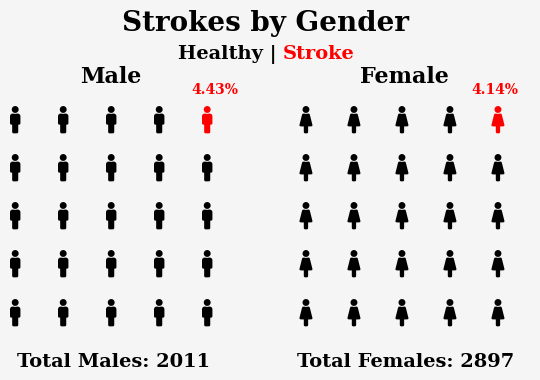

In [7]:
# Gender groupby/viz
males_total = stroke_data.groupby('gender').gender.count()['Male']
per_males_healthy = stroke_data[stroke_data.stroke==0].groupby('gender').gender.count()['Male'] / males_total
per_males_stroke = stroke_data[stroke_data.stroke==1].groupby('gender').gender.count()['Male'] / males_total
males_healthy = round(per_males_healthy * 25, 0)
males_stroke = round(per_males_stroke * 25, 0)

females_total = stroke_data.groupby('gender').gender.count()['Female']
per_females_healthy = stroke_data[stroke_data.stroke==0].groupby('gender').gender.count()['Female'] / females_total
per_females_stroke = stroke_data[stroke_data.stroke==1].groupby('gender').gender.count()['Female'] / females_total
females_healthy = round(per_females_healthy * 25, 0)
females_stroke = round(per_females_stroke * 25, 0)


fig = plt.figure(FigureClass = Waffle,
                constrained_layout = True,
                figsize = (7,7),
                facecolor = '#f5f5f5', dpi = 100,
                
                plots = {121: #males with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [males_healthy, males_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'male',
                            'icon_legend': False,
                            'icon_size': 20,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                
                        122: #females with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [females_healthy, females_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'female',
                            'icon_legend': False,
                            'icon_size': 20,
                            'plot_anchor': 'C',
                            'alpha': 1
                        }
                        },
                )

# Labels/Legends
fig.text(0.30, 0.75, 'Strokes by Gender', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':20})
fig.text(0.24, 0.675, 'Male', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.64, 0.675, 'Female', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.15, 0.27, 'Total Males: ' + str(males_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.55, 0.27, 'Total Females: ' + str(females_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.38, 0.71, 'Healthy | ', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.53, 0.71, 'Stroke', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':14})
fig.text(0.40, 0.66, '4.43%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.80, 0.66, '4.14%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})


plt.show()

In [12]:
[males_total,
per_males_stroke,
females_total,
per_females_stroke]

[2011, 0.044256588761810045, 2897, 0.04142216085605799]

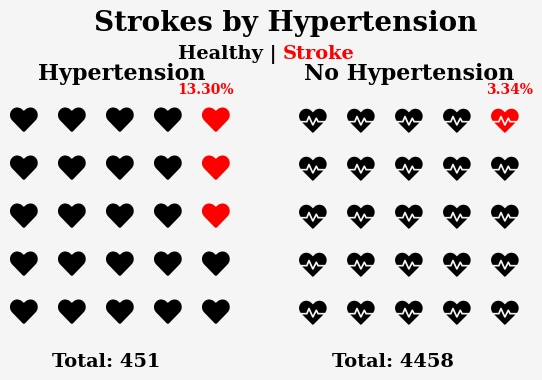

In [9]:
hypertension_total = stroke_data.groupby('hypertension').hypertension.count()[1]
per_hypertension_stroke = stroke_data[stroke_data.stroke==1].groupby('hypertension').hypertension.count()[1] / hypertension_total
per_hypertension_healthy = stroke_data[stroke_data.stroke==0].groupby('hypertension').hypertension.count()[1] / hypertension_total
hypertension_stroke = round(per_hypertension_stroke * 25, 0)
hypertension_healthy = round(per_hypertension_healthy * 25, 0)

no_hypertension_total = stroke_data.groupby('hypertension').hypertension.count()[0]
per_no_hypertension_stroke = stroke_data[stroke_data.stroke==1].groupby('hypertension').hypertension.count()[0] / no_hypertension_total
per_no_hypertension_healthy = stroke_data[stroke_data.stroke==0].groupby('hypertension').hypertension.count()[0] / no_hypertension_total
no_hypertension_stroke = round(per_no_hypertension_stroke * 25, 0)
no_hypertension_healthy = round(per_no_hypertension_healthy * 25, 0)



fig = plt.figure(FigureClass = Waffle,
                constrained_layout = True,
                figsize = (7,7),
                facecolor = '#f5f5f5', dpi = 100,
                
                plots = {121: #hypertension with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [hypertension_healthy, hypertension_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'heart',
                            'icon_legend': False,
                            'icon_size': 20,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                
                        122: #no hypertension with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [no_hypertension_healthy, no_hypertension_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'heartbeat',
                            'icon_legend': False,
                            'icon_size': 20,
                            'plot_anchor': 'C',
                            'alpha': 1
                        }
                        },
                )

# Labels/Legends
fig.text(0.26, 0.75, 'Strokes by Hypertension', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':20})
fig.text(0.18, 0.68, 'Hypertension', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.56, 0.68, 'No Hypertension', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.20, 0.27, 'Total: ' + str(hypertension_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.60, 0.27, 'Total: ' + str(no_hypertension_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.38, 0.71, 'Healthy | ', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.53, 0.71, 'Stroke', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':14})
fig.text(0.38, 0.66, '13.30%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.82, 0.66, '3.34%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})


plt.show()

In [12]:
[hypertension_total,
per_hypertension_stroke,
no_hypertension_total,
per_no_hypertension_stroke]

[451, 0.13303769401330376, 4458, 0.03342305966801256]

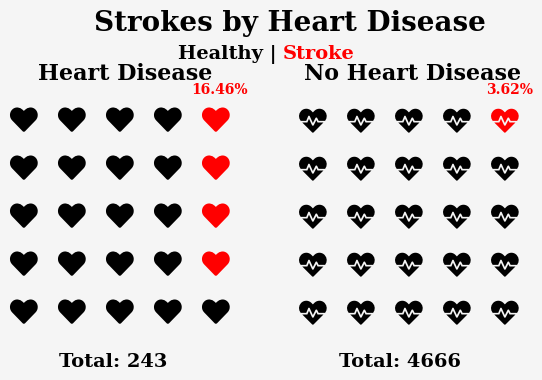

In [70]:
heart_disease_total = stroke_data.groupby('heart_disease').heart_disease.count()[1]
per_heart_disease_stroke = stroke_data[stroke_data.stroke==1].groupby('heart_disease').heart_disease.count()[1] / heart_disease_total
per_heart_disease_healthy = stroke_data[stroke_data.stroke==0].groupby('heart_disease').heart_disease.count()[1] / heart_disease_total
heart_disease_stroke = round(per_heart_disease_stroke * 25, 0)
heart_disease_healthy = round(per_heart_disease_healthy * 25, 0)

no_heart_disease_total = stroke_data.groupby('heart_disease').heart_disease.count()[0]
per_no_heart_disease_stroke = stroke_data[stroke_data.stroke==1].groupby('heart_disease').heart_disease.count()[0] / no_heart_disease_total
per_no_heart_disease_healthy = stroke_data[stroke_data.stroke==0].groupby('heart_disease').heart_disease.count()[0] / no_heart_disease_total
no_heart_disease_stroke = round(per_no_heart_disease_stroke * 25, 0)
no_heart_disease_healthy = round(per_no_heart_disease_healthy * 25, 0)



fig = plt.figure(FigureClass = Waffle,
                constrained_layout = True,
                figsize = (7,7),
                facecolor = '#f5f5f5', dpi = 100,
                
                plots = {121: #heart disease with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [heart_disease_healthy, heart_disease_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'heart',
                            'icon_legend': False,
                            'icon_size': 20,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                
                        122: #no heart disease with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [no_heart_disease_healthy, no_heart_disease_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'heartbeat',
                            'icon_legend': False,
                            'icon_size': 20,
                            'plot_anchor': 'C',
                            'alpha': 1
                        }
                        },
                )

# Labels/Legends
fig.text(0.26, 0.75, 'Strokes by Heart Disease', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':20})
fig.text(0.18, 0.68, 'Heart Disease', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.56, 0.68, 'No Heart Disease', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.21, 0.27, 'Total: ' + str(heart_disease_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.61, 0.27, 'Total: ' + str(no_heart_disease_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.38, 0.71, 'Healthy | ', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.53, 0.71, 'Stroke', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':14})
fig.text(0.40, 0.66, '16.46%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.82, 0.66, '3.62%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})


plt.show()

In [14]:
[heart_disease_total,
per_heart_disease_stroke,
no_heart_disease_total,
per_no_heart_disease_stroke]

[243, 0.1646090534979424, 4666, 0.03621945992284612]

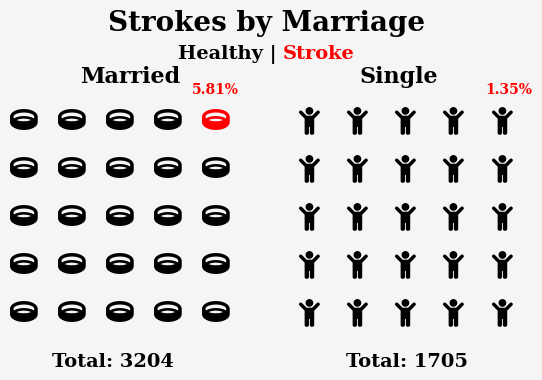

In [30]:
married_total = stroke_data.groupby('ever_married').ever_married.count()['Yes']
per_married_stroke = stroke_data[stroke_data.stroke==1].groupby('ever_married').ever_married.count()['Yes'] / married_total
per_married_healthy = stroke_data[stroke_data.stroke==0].groupby('ever_married').ever_married.count()['Yes'] / married_total
married_stroke = round(per_married_stroke * 25, 0)
married_healthy = round(per_married_healthy * 25, 0)

single_total = stroke_data.groupby('ever_married').ever_married.count()['No']
per_single_stroke = stroke_data[stroke_data.stroke==1].groupby('ever_married').ever_married.count()['No'] / single_total
per_single_healthy = stroke_data[stroke_data.stroke==0].groupby('ever_married').ever_married.count()['No'] / single_total
single_stroke = round(per_single_stroke * 25, 0)
single_healthy = round(per_single_healthy * 25, 0)



fig = plt.figure(FigureClass = Waffle,
                constrained_layout = True,
                figsize = (7,7),
                facecolor = '#f5f5f5', dpi = 100,
                
                plots = {121: #married with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [married_healthy, married_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'ring',
                            'icon_legend': False,
                            'icon_size': 20,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                
                        122: #single with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [single_healthy, single_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'child',
                            'icon_legend': False,
                            'icon_size': 20,
                            'plot_anchor': 'C',
                            'alpha': 1
                        }
                        },
                )

# Labels/Legends
fig.text(0.28, 0.75, 'Strokes by Marriage', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':20})
fig.text(0.24, 0.675, 'Married', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.64, 0.675, 'Single', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.20, 0.27, 'Total: ' + str(married_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.62, 0.27, 'Total: ' + str(single_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.38, 0.71, 'Healthy | ', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.53, 0.71, 'Stroke', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':14})
fig.text(0.40, 0.66, '5.81%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.82, 0.66, '1.35%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})


plt.show()

In [16]:
[married_total,
per_married_stroke,
single_total,
per_single_stroke]

[3204, 0.05805243445692884, 1705, 0.013489736070381233]

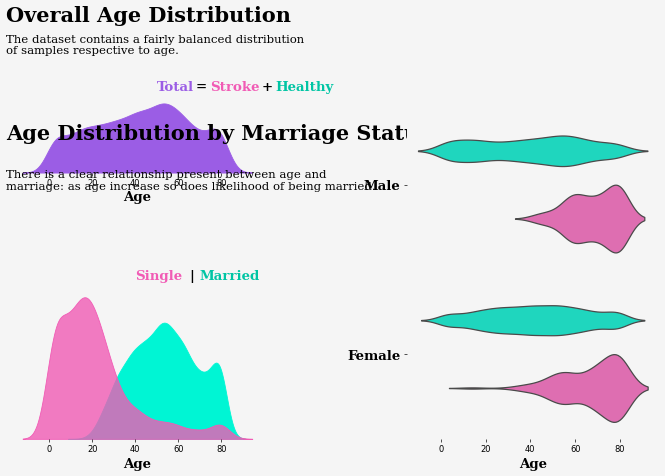

In [35]:
# group age and marriage status vs stroke
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['#00f5d4','#f15bb5']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 6:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)


#-------Ax 1------------------------------------------------
sns.kdeplot('age', data=stroke_data, ax=ax1, shade=True, color='#9b5de5', alpha=1)
ax1.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.text(-20, 0.035, 'Overall Age Distribution', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax1.text(-20, 0.0275, 'The dataset contains a fairly balanced distribution \nof samples respective to age.',
         {'font':'Serif', 'color': 'black', 'size':14})
ax1.text(50, 0.019, 'Total',{'font':'Serif', 'size':'16','color': '#9b5de5','weight':'bold'})
ax1.text(68, 0.019, '=',{'font':'Serif', 'size':'16','color': 'black','weight':'bold'})
ax1.text(75, 0.019, 'Stroke',{'font':'Serif', 'size':'16','color': '#f15bb5','weight':'bold'})
ax1.text(98.5, 0.019, '+',{'font':'Serif', 'size':'16','color': 'black','weight':'bold'})
ax1.text(105, 0.019, 'Healthy',{'font':'Serif', 'size':'16','color': '#00c5a4','weight':'bold'})

#-------Ax 2------------------------------------------------
## sns.kdeplot('age', data=stroke_data[stroke_data.ever_married=='Yes'])
sns.kdeplot('age', data=stroke_data[stroke_data.ever_married=='Yes'], ax=ax2, shade=True, 
            color='#00f5d4', alpha=1)
sns.kdeplot('age', data=stroke_data[stroke_data.ever_married=='No'], ax=ax2, shade=True, 
            color='#f15bb5', alpha=0.8)
ax2.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(-20, 0.06, 'Age Distribution by Marriage Status', {'font':'Serif', 'size':'25','color': 'black','weight':'bold'})
ax2.text(-20, 0.05, 'There is a clear relationship present between age and\nmarriage: as age increase so does ' +\
                         'likelihood of being married.',
         {'font':'Serif', 'color': 'black', 'size':14})
ax2.text(40, 0.032,'Single', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#f15bb5'})
ax2.text(65, 0.032,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax2.text(70, 0.032,'Married', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'#00c5a4'})


#-------Ax 3------------------------------------------------
ax3.get_yaxis().set_visible(True)
sns.violinplot(x='age', y='gender', data=stroke_data[stroke_data.gender!='Other'],
               hue='stroke', ax=ax3, aspect=2, inner=None)
ax3.set_yticklabels( labels = ['Male', 'Female'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_ylabel('')
ax3.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.get_legend().remove()

plt.show()

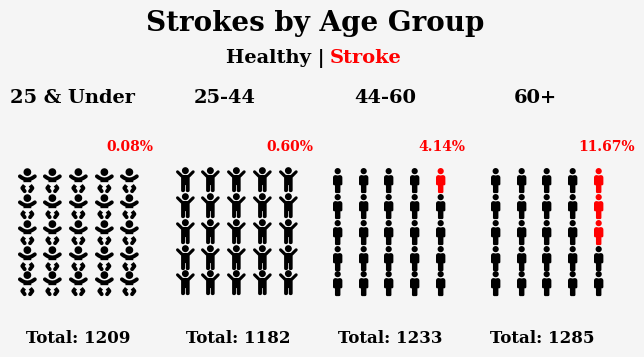

In [11]:
# Age grouping stroke viz 0-3
# Group 0
age_0_total = encoded_data.groupby('age_grouping').age_grouping.count()[0]
per_age_0_healthy = encoded_data[encoded_data.stroke==0].groupby('age_grouping').age_grouping.count()[0] / age_0_total
per_age_0_stroke = encoded_data[encoded_data.stroke==1].groupby('age_grouping').age_grouping.count()[0] / age_0_total
age_0_healthy = round(per_age_0_healthy * 25, 0)
age_0_stroke = round(per_age_0_stroke * 25, 0)

# Group 1
age_1_total = encoded_data.groupby('age_grouping').age_grouping.count()[1]
per_age_1_healthy = encoded_data[encoded_data.stroke==0].groupby('age_grouping').age_grouping.count()[1] / age_1_total
per_age_1_stroke = encoded_data[encoded_data.stroke==1].groupby('age_grouping').age_grouping.count()[1] / age_1_total
age_1_healthy = round(per_age_1_healthy * 25, 0)
age_1_stroke = round(per_age_1_stroke * 25, 0)

# Group 2
age_2_total = encoded_data.groupby('age_grouping').age_grouping.count()[2]
per_age_2_healthy = encoded_data[encoded_data.stroke==0].groupby('age_grouping').age_grouping.count()[2] / age_2_total
per_age_2_stroke = encoded_data[encoded_data.stroke==1].groupby('age_grouping').age_grouping.count()[2] / age_2_total
age_2_healthy = round(per_age_2_healthy * 25, 0)
age_2_stroke = round(per_age_2_stroke * 25, 0)

# Group 3
age_3_total = encoded_data.groupby('age_grouping').age_grouping.count()[3]
per_age_3_healthy = encoded_data[encoded_data.stroke==0].groupby('age_grouping').age_grouping.count()[3] / age_3_total
per_age_3_stroke = encoded_data[encoded_data.stroke==1].groupby('age_grouping').age_grouping.count()[3] / age_3_total
age_3_healthy = round(per_age_3_healthy * 25, 0)
age_3_stroke = round(per_age_3_stroke * 25, 0)




fig = plt.figure(FigureClass = Waffle,
                constrained_layout = True,
                figsize = (8,8),
                facecolor = '#f5f5f5', dpi = 100,
                
                plots = {141: # age group 0 with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [age_0_healthy, age_0_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'baby',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                
                        142: # group 1 with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [age_1_healthy, age_1_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'child',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        143: # group 2 with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [age_2_healthy, age_2_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'male',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        144: # group 3 with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [age_3_healthy, age_3_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'male',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        }
                        },
                )

# Labels/Legends
fig.text(0.30, 0.75, 'Strokes by Age Group', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':20})
fig.text(0.13, 0.66, '25 & Under', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.36, 0.66, '25-44', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.56, 0.66, '44-60', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.76, 0.66, '60+', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.15, 0.36, 'Total: ' + str(age_0_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.35, 0.36, 'Total: ' + str(age_1_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.54, 0.36, 'Total: ' + str(age_2_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.73, 0.36, 'Total: ' + str(age_3_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.40, 0.71, 'Healthy | ', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.53, 0.71, 'Stroke', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':14})
fig.text(0.25, 0.60, '0.08%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.45, 0.60, '0.60%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.64, 0.60, '4.14%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.84, 0.60, '11.67%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})


plt.show()

In [19]:
[age_0_total, per_age_0_stroke, age_1_total, per_age_1_stroke, age_2_total, per_age_2_stroke, age_3_total, per_age_3_stroke]

[1209,
 0.0008271298593879239,
 1182,
 0.005922165820642978,
 1233,
 0.0413625304136253,
 1285,
 0.11673151750972763]

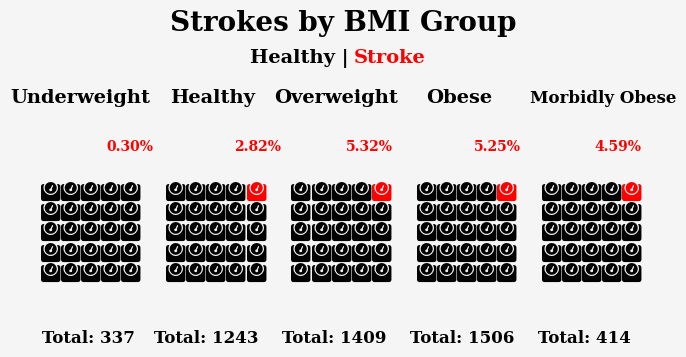

In [16]:
# BMI grouping stroke viz 0-4
# Group 0
bmi_0_total = encoded_data.groupby('bmi_grouping').bmi_grouping.count()[0]
per_bmi_0_healthy = encoded_data[encoded_data.stroke==0].groupby('bmi_grouping').bmi_grouping.count()[0] / bmi_0_total
per_bmi_0_stroke = encoded_data[encoded_data.stroke==1].groupby('bmi_grouping').bmi_grouping.count()[0] / bmi_0_total
bmi_0_healthy = round(per_bmi_0_healthy * 25, 0)
bmi_0_stroke = round(per_bmi_0_stroke * 25, 0)

# Group 1
bmi_1_total = encoded_data.groupby('bmi_grouping').bmi_grouping.count()[1]
per_bmi_1_healthy = encoded_data[encoded_data.stroke==0].groupby('bmi_grouping').bmi_grouping.count()[1] / bmi_1_total
per_bmi_1_stroke = encoded_data[encoded_data.stroke==1].groupby('bmi_grouping').bmi_grouping.count()[1] / bmi_1_total
bmi_1_healthy = round(per_bmi_1_healthy * 25, 0)
bmi_1_stroke = round(per_bmi_1_stroke * 25, 0)

# Group 2
bmi_2_total = encoded_data.groupby('bmi_grouping').bmi_grouping.count()[2]
per_bmi_2_healthy = encoded_data[encoded_data.stroke==0].groupby('bmi_grouping').bmi_grouping.count()[2] / bmi_2_total
per_bmi_2_stroke = encoded_data[encoded_data.stroke==1].groupby('bmi_grouping').bmi_grouping.count()[2] / bmi_2_total
bmi_2_healthy = round(per_bmi_2_healthy * 25, 0)
bmi_2_stroke = round(per_bmi_2_stroke * 25, 0)

# Group 3
bmi_3_total = encoded_data.groupby('bmi_grouping').bmi_grouping.count()[3]
per_bmi_3_healthy = encoded_data[encoded_data.stroke==0].groupby('bmi_grouping').bmi_grouping.count()[3] / bmi_3_total
per_bmi_3_stroke = encoded_data[encoded_data.stroke==1].groupby('bmi_grouping').bmi_grouping.count()[3] / bmi_3_total
bmi_3_healthy = round(per_bmi_3_healthy * 25, 0)
bmi_3_stroke = round(per_bmi_3_stroke * 25, 0)

# Group 4
bmi_4_total = encoded_data.groupby('bmi_grouping').bmi_grouping.count()[4]
per_bmi_4_healthy = encoded_data[encoded_data.stroke==0].groupby('bmi_grouping').bmi_grouping.count()[4] / bmi_4_total
per_bmi_4_stroke = encoded_data[encoded_data.stroke==1].groupby('bmi_grouping').bmi_grouping.count()[4] / bmi_4_total
bmi_4_healthy = round(per_bmi_4_healthy * 25, 0)
bmi_4_stroke = round(per_bmi_4_stroke * 25, 0)



fig = plt.figure(FigureClass = Waffle,
                constrained_layout = True,
                figsize = (8,8),
                facecolor = '#f5f5f5', dpi = 100,
                
                plots = {151: # underweight with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [bmi_0_healthy, bmi_0_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'weight',
                            'icon_legend': False,
                            'icon_size': 14,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                
                        152: # healthy with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [bmi_1_healthy, bmi_1_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'weight',
                            'icon_legend': False,
                            'icon_size': 14,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        153: # overweight with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [bmi_2_healthy, bmi_2_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'weight',
                            'icon_legend': False,
                            'icon_size': 14,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        154: # obese with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [bmi_3_healthy, bmi_3_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'weight',
                            'icon_legend': False,
                            'icon_size': 14,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        155: # morbidly obese with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [bmi_3_healthy, bmi_3_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'weight',
                            'icon_legend': False,
                            'icon_size': 14,
                            'plot_anchor': 'C',
                            'alpha': 1
                        }
                        },
                )

# Labels/Legends
fig.text(0.30, 0.75, 'Strokes by BMI Group', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':20})
fig.text(0.10, 0.66, 'Underweight', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.30, 0.66, 'Healthy', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.43, 0.66, 'Overweight', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.62, 0.66, 'Obese', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.75, 0.66, 'Morbidly Obese', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.14, 0.36, 'Total: ' + str(bmi_0_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.28, 0.36, 'Total: ' + str(bmi_1_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.44, 0.36, 'Total: ' + str(bmi_2_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.60, 0.36, 'Total: ' + str(bmi_3_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.76, 0.36, 'Total: ' + str(bmi_4_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.40, 0.71, 'Healthy | ', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.53, 0.71, 'Stroke', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':14})
fig.text(0.22, 0.60, '0.30%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.38, 0.60, '2.82%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.52, 0.60, '5.32%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.68, 0.60, '5.25%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.83, 0.60, '4.59%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})


plt.show()

In [21]:
[bmi_0_total, per_bmi_0_stroke, bmi_1_total, per_bmi_1_stroke, bmi_2_total, per_bmi_2_stroke, bmi_3_total, per_bmi_3_stroke, bmi_4_total, per_bmi_4_stroke]

[337,
 0.002967359050445104,
 1243,
 0.02815768302493966,
 1409,
 0.053229240596167494,
 1506,
 0.05245683930942895,
 414,
 0.04589371980676329]

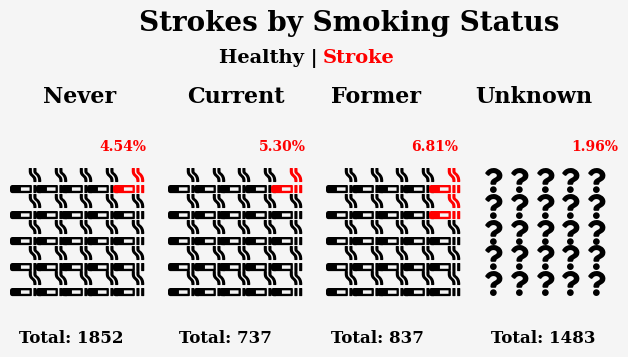

In [18]:
# Smoking grouping stroke viz (not encoded)
# Never smoked
never_smoked_total = stroke_data.groupby('smoking_status').smoking_status.count()['never smoked']
per_never_smoked_stroke = stroke_data[stroke_data.stroke==1].groupby('smoking_status').smoking_status.count()['never smoked'] / never_smoked_total
per_never_smoked_healthy = stroke_data[stroke_data.stroke==0].groupby('smoking_status').smoking_status.count()['never smoked'] / never_smoked_total
never_smoked_stroke = round(per_never_smoked_stroke * 25, 0)
never_smoked_healthy = round(per_never_smoked_healthy * 25, 0)

# Current smoker
smokes_total = stroke_data.groupby('smoking_status').smoking_status.count()['smokes']
per_smokes_stroke = stroke_data[stroke_data.stroke==1].groupby('smoking_status').smoking_status.count()['smokes'] / smokes_total
per_smokes_healthy = stroke_data[stroke_data.stroke==0].groupby('smoking_status').smoking_status.count()['smokes'] / smokes_total
smokes_stroke = round(per_smokes_stroke * 25, 0)
smokes_healthy = round(per_smokes_healthy * 25, 0)

# Former smoker
formerly_smoked_total = stroke_data.groupby('smoking_status').smoking_status.count()['formerly smoked']
per_formerly_smoked_stroke = stroke_data[stroke_data.stroke==1].groupby('smoking_status').smoking_status.count()['formerly smoked'] / formerly_smoked_total
per_formerly_smoked_healthy = stroke_data[stroke_data.stroke==0].groupby('smoking_status').smoking_status.count()['formerly smoked'] / formerly_smoked_total
formerly_smoked_stroke = round(per_formerly_smoked_stroke * 25, 0)
formerly_smoked_healthy = round(per_formerly_smoked_healthy * 25, 0)

# Unknown
unknown_total = stroke_data.groupby('smoking_status').smoking_status.count()['Unknown']
per_unknown_stroke = stroke_data[stroke_data.stroke==1].groupby('smoking_status').smoking_status.count()['Unknown'] / unknown_total
per_unknown_healthy = stroke_data[stroke_data.stroke==0].groupby('smoking_status').smoking_status.count()['Unknown'] / unknown_total
unknown_stroke = round(per_unknown_stroke * 25, 0)
unknown_healthy = round(per_unknown_healthy * 25, 0)



fig = plt.figure(FigureClass = Waffle,
                constrained_layout = True,
                figsize = (8,8),
                facecolor = '#f5f5f5', dpi = 100,
                
                plots = {141: # never smoked with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [never_smoked_healthy, never_smoked_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'smoking',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                
                        142: # current smoker with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [smokes_healthy, smokes_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'smoking',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        143: # formerly smoked with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [formerly_smoked_healthy, formerly_smoked_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'smoking',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        144: # unknown with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [unknown_healthy, unknown_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'question',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        }
                        },
                )

# Labels/Legends
fig.text(0.30, 0.75, 'Strokes by Smoking Status', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':20})
fig.text(0.18, 0.66, 'Never', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.36, 0.66, 'Current', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.54, 0.66, 'Former', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.72, 0.66, 'Unknown', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.15, 0.36, 'Total: ' + str(never_smoked_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.35, 0.36, 'Total: ' + str(smokes_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.54, 0.36, 'Total: ' + str(formerly_smoked_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.74, 0.36, 'Total: ' + str(unknown_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.40, 0.71, 'Healthy | ', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.53, 0.71, 'Stroke', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':14})
fig.text(0.25, 0.60, '4.54%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.45, 0.60, '5.30%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.64, 0.60, '6.81%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.84, 0.60, '1.96%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})


plt.show()

In [24]:
[never_smoked_total, per_never_smoked_stroke, smokes_total, per_smokes_stroke, formerly_smoked_total, per_formerly_smoked_stroke, unknown_total, per_unknown_stroke]

[1852,
 0.04535637149028078,
 737,
 0.052917232021709636,
 837,
 0.06810035842293907,
 1483,
 0.019554956169925825]

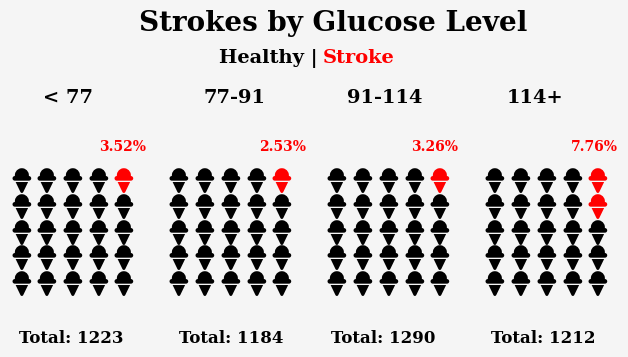

In [22]:
# Glucose lvl stroke viz 0-3
# Group 0
gl_0_total = encoded_data.groupby('gl_grouping').gl_grouping.count()[0]
per_gl_0_healthy = encoded_data[encoded_data.stroke==0].groupby('gl_grouping').gl_grouping.count()[0] / gl_0_total
per_gl_0_stroke = encoded_data[encoded_data.stroke==1].groupby('gl_grouping').gl_grouping.count()[0] / gl_0_total
gl_0_healthy = round(per_gl_0_healthy * 25, 0)
gl_0_stroke = round(per_gl_0_stroke * 25, 0)

# Group 1
gl_1_total = encoded_data.groupby('gl_grouping').gl_grouping.count()[1]
per_gl_1_healthy = encoded_data[encoded_data.stroke==0].groupby('gl_grouping').gl_grouping.count()[1] / gl_1_total
per_gl_1_stroke = encoded_data[encoded_data.stroke==1].groupby('gl_grouping').gl_grouping.count()[1] / gl_1_total
gl_1_healthy = round(per_gl_1_healthy * 25, 0)
gl_1_stroke = round(per_gl_1_stroke * 25, 0)

# Group 2
gl_2_total = encoded_data.groupby('gl_grouping').gl_grouping.count()[2]
per_gl_2_healthy = encoded_data[encoded_data.stroke==0].groupby('gl_grouping').gl_grouping.count()[2] / gl_2_total
per_gl_2_stroke = encoded_data[encoded_data.stroke==1].groupby('gl_grouping').gl_grouping.count()[2] / gl_2_total
gl_2_healthy = round(per_gl_2_healthy * 25, 0)
gl_2_stroke = round(per_gl_2_stroke * 25, 0)

# Group 3
gl_3_total = encoded_data.groupby('gl_grouping').gl_grouping.count()[3]
per_gl_3_healthy = encoded_data[encoded_data.stroke==0].groupby('gl_grouping').gl_grouping.count()[3] / gl_3_total
per_gl_3_stroke = encoded_data[encoded_data.stroke==1].groupby('gl_grouping').gl_grouping.count()[3] / gl_3_total
gl_3_healthy = round(per_gl_3_healthy * 25, 0)
gl_3_stroke = round(per_gl_3_stroke * 25, 0)



fig = plt.figure(FigureClass = Waffle,
                constrained_layout = True,
                figsize = (8,8),
                facecolor = '#f5f5f5', dpi = 100,
                
                plots = {141: # GL group 0 with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [gl_0_healthy, gl_0_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'ice-cream',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                
                        142: # group 1 with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [gl_1_healthy, gl_1_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'ice-cream',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        143: # group 2 with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [gl_2_healthy, gl_2_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'ice-cream',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        144: # group 3 with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [gl_3_healthy, gl_3_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'ice-cream',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        }
                        },
                )

# Labels/Legends
fig.text(0.30, 0.75, 'Strokes by Glucose Level', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':20})
fig.text(0.18, 0.66, '< 77', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.38, 0.66, '77-91', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.56, 0.66, '91-114', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.76, 0.66, '114+', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.15, 0.36, 'Total: ' + str(gl_0_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.35, 0.36, 'Total: ' + str(gl_1_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.54, 0.36, 'Total: ' + str(gl_2_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.74, 0.36, 'Total: ' + str(gl_3_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.40, 0.71, 'Healthy | ', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.53, 0.71, 'Stroke', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':14})
fig.text(0.25, 0.60, '3.52%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.45, 0.60, '2.53%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.64, 0.60, '3.26%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.84, 0.60, '7.76%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})


plt.show()

In [26]:
[gl_0_total, per_gl_0_stroke, gl_1_total, per_gl_1_stroke, gl_2_total, per_gl_2_stroke, gl_3_total, per_gl_3_stroke]

[1223,
 0.03515944399018806,
 1184,
 0.02533783783783784,
 1290,
 0.03255813953488372,
 1212,
 0.07755775577557755]

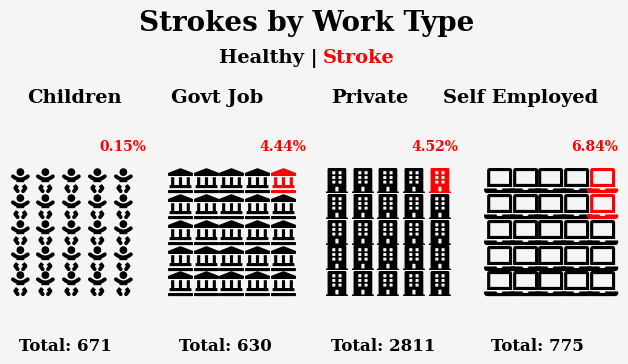

In [26]:
# Work type stroke viz (not encoded)
# Children
children_total = stroke_data.groupby('work_type').work_type.count()['children']
per_children_stroke = stroke_data[stroke_data.stroke==1].groupby('work_type').work_type.count()['children'] / children_total
per_children_healthy = stroke_data[stroke_data.stroke==0].groupby('work_type').work_type.count()['children'] / children_total
children_stroke = round(per_children_stroke * 25, 0)
children_healthy = round(per_children_healthy * 25, 0)

# Govt
govt_job_total = stroke_data.groupby('work_type').work_type.count()['Govt_job']
per_govt_job_stroke = stroke_data[stroke_data.stroke==1].groupby('work_type').work_type.count()['Govt_job'] / govt_job_total
per_govt_job_healthy = stroke_data[stroke_data.stroke==0].groupby('work_type').work_type.count()['Govt_job'] / govt_job_total
govt_job_stroke = round(per_govt_job_stroke * 25, 0)
govt_job_healthy = round(per_govt_job_healthy * 25, 0)

# Private
private_total = stroke_data.groupby('work_type').work_type.count()['Private']
per_private_stroke = stroke_data[stroke_data.stroke==1].groupby('work_type').work_type.count()['Private'] / private_total
per_private_healthy = stroke_data[stroke_data.stroke==0].groupby('work_type').work_type.count()['Private'] / private_total
private_stroke = round(per_private_stroke * 25, 0)
private_healthy = round(per_private_healthy * 25, 0)

# Self-employed
self_employed_total = stroke_data.groupby('work_type').work_type.count()['Self-employed']
per_self_employed_stroke = stroke_data[stroke_data.stroke==1].groupby('work_type').work_type.count()['Self-employed'] / self_employed_total
per_self_employed_healthy = stroke_data[stroke_data.stroke==0].groupby('work_type').work_type.count()['Self-employed'] / self_employed_total
self_employed_stroke = round(per_self_employed_stroke * 25, 0)
self_employed_healthy = round(per_self_employed_healthy * 25, 0)

# Never_worked
never_worked_total = stroke_data.groupby('work_type').work_type.count()['Never_worked']



fig = plt.figure(FigureClass = Waffle,
                constrained_layout = True,
                figsize = (8,8),
                facecolor = '#f5f5f5', dpi = 100,
                
                plots = {141: # children with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [children_healthy, children_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'baby',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                
                        142: # govt job with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [govt_job_healthy, govt_job_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'landmark',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        143: # private with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [private_healthy, private_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'building',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                         
                        144: # self-employed with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [self_employed_healthy, self_employed_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'laptop',
                            'icon_legend': False,
                            'icon_size': 18,
                            'plot_anchor': 'C',
                            'alpha': 1
                        }
                        },
                )

# Labels/Legends
fig.text(0.30, 0.75, 'Strokes by Work Type', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':20})
fig.text(0.16, 0.66, 'Children', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.34, 0.66, 'Govt Job', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.54, 0.66, 'Private', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.68, 0.66, 'Self Employed', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.15, 0.35, 'Total: ' + str(children_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.35, 0.35, 'Total: ' + str(govt_job_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.54, 0.35, 'Total: ' + str(private_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.74, 0.35, 'Total: ' + str(self_employed_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':12})
fig.text(0.40, 0.71, 'Healthy | ', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.53, 0.71, 'Stroke', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':14})
fig.text(0.25, 0.60, '0.15%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.45, 0.60, '4.44%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.64, 0.60, '4.52%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.84, 0.60, '6.84%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})


plt.show()

In [33]:
[children_total, per_children_stroke, govt_job_total, per_govt_job_stroke, private_total, per_private_stroke, self_employed_total, per_self_employed_stroke, never_worked_total, 0]

[671,
 0.0014903129657228018,
 630,
 0.044444444444444446,
 2811,
 0.04517965136961935,
 775,
 0.06838709677419355,
 22,
 0]

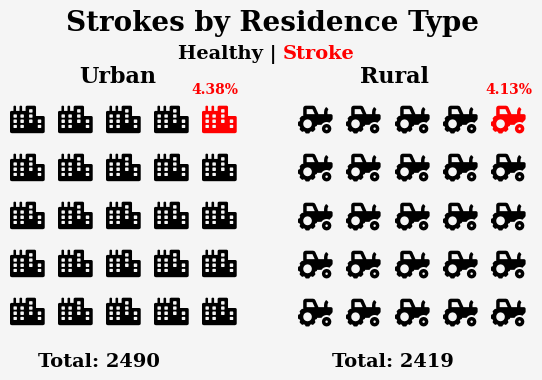

In [16]:
urban_total = stroke_data.groupby('Residence_type').Residence_type.count()['Urban']
per_urban_stroke = stroke_data[stroke_data.stroke==1].groupby('Residence_type').Residence_type.count()['Urban'] / urban_total
per_urban_healthy = stroke_data[stroke_data.stroke==0].groupby('Residence_type').Residence_type.count()['Urban'] / urban_total
urban_stroke = round(per_urban_stroke * 25, 0)
urban_healthy = round(per_urban_healthy * 25, 0)

rural_total = stroke_data.groupby('Residence_type').Residence_type.count()['Rural']
per_rural_stroke = stroke_data[stroke_data.stroke==1].groupby('Residence_type').Residence_type.count()['Rural'] / rural_total
per_rural_healthy = stroke_data[stroke_data.stroke==0].groupby('Residence_type').Residence_type.count()['Rural'] / rural_total
rural_stroke = round(per_rural_stroke * 25, 0)
rural_healthy = round(per_rural_healthy * 25, 0)



fig = plt.figure(FigureClass = Waffle,
                constrained_layout = True,
                figsize = (7,7),
                facecolor = '#f5f5f5', dpi = 100,
                
                plots = {121: #married with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [urban_healthy, urban_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'city',
                            'icon_legend': False,
                            'icon_size': 20,
                            'plot_anchor': 'C',
                            'alpha': 1
                        },
                
                        122: #single with and w/o stroke
                        {
                            'rows':5,
                            'columns':5,
                            'values': [rural_healthy, rural_stroke],
                            'colors': ['k', 'r'],
                            'icons': 'tractor',
                            'icon_legend': False,
                            'icon_size': 20,
                            'plot_anchor': 'C',
                            'alpha': 1
                        }
                        },
                )

# Labels/Legends
fig.text(0.22, 0.75, 'Strokes by Residence Type', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':20})
fig.text(0.24, 0.675, 'Urban', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.64, 0.675, 'Rural', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':16})
fig.text(0.18, 0.27, 'Total: ' + str(urban_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.60, 0.27, 'Total: ' + str(rural_total), {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.38, 0.71, 'Healthy | ', {'font':'Serif', 'weight':'bold', 'color':'k', 'size':14})
fig.text(0.53, 0.71, 'Stroke', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':14})
fig.text(0.40, 0.66, '4.38%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})
fig.text(0.82, 0.66, '4.13%', {'font':'Serif', 'weight':'bold', 'color':'r', 'size':10})


plt.show()

In [9]:
[urban_total, per_urban_stroke, rural_total, per_rural_stroke]

[2490, 0.043775100401606426, 2419, 0.0413393964448119]